In [1]:
def hint(string): return print(''.join(map(chr, map(lambda x: int(x, 16), string.replace('+', ' ').split()))))

## Environment
+ Pycharm
+ python3.6
+ networkx
+ jieba
+ numpy, pandas, matplotlib
+ gensim

## Background Knowledge

Q1. 简述自动摘要技术的三个应用场景？

回答：1.新闻摘要。 2.信息抽取。 3.聊天机器人

##### 提示，如果需要帮助，可以运行以下的提示

In [2]:
# remove the # before hint(), to show the example sulution.
hint('0xa 0x641c 0x7d22 0x5f15 0x64ce 0xff1b 0xa 0x32 0x2e 0x20 0x89c2 0x70b9 0x62bd 0x53d6 0xff1b 0xa 0x33 0x2e 0x20 0x65b0 0x95fb 0xff1b 0xa 0x34 0x2e 0x20 0x6c47 0x62a5 0x6587 0x6863 0xa')


搜索引擎；
2. 观点抽取；
3. 新闻；
4. 汇报文档



Q2. 目前的摘要技术分为哪两类？

回答：1.extraction:识别出文本中的重要部分并且抽取出来作为文本的摘要。
2.abstraction:用比较先进的自然语言处理技术去生成包含原文重要信息的摘要，这种方法涉及语意表征、推断和自然语言生成等，这些都是比较难解决的问题。

In [3]:
hint('0xa 0x6458 0x8981 0x20 0x41 0x62 0x73 0x74 0x72 0x61 0x63 0x74 0x69 0x76 0x65 0x3a 0x20 0x91cd 0x65b0 0x6574 0x7406 0x4fe1 0x606f 0xa 0x62bd 0x53d6 0x20 0x45 0x78 0x74 0x72 0x61 0x63 0x74 0x69 0x76 0x65 0x3a 0x20 0x4ece 0x539f 0x6587 0x4e2d 0x63d0 0x53d6 0x90e8 0x5206 0xa')


摘要 Abstractive: 重新整理信息
抽取 Extractive: 从原文中提取部分



Q3. 目前实现自动摘要的难点在哪里？列出三点。

回答：1.缺乏标注数据，无监督学习效果不太好。2.涉及语意理解、推断和自然语言生成，问题难度大。3.对于文本摘要的效果没有一个很好的衡量标准。

In [4]:
hint('0xa 0x31 0x2e 0x20 0x7f3a 0x4e4f 0x6807 0x6ce8 0x8bad 0x7ec3 0x6570 0x636e 0xff1b 0xa 0x32 0x2e 0x20 0x57fa 0x4e8e 0x6587 0x672c 0x7406 0x89e3 0xff0c 0x63d0 0x53d6 0x91cd 0x8981 0x5185 0x5bb9 0x96be 0xff1b 0xa 0x33 0x2e 0x20 0x4eba 0x7c7b 0x5bf9 0x6587 0x672c 0x903b 0x8f91 0x654f 0x611f 0xff0c 0x6458 0x8981 0x7ed3 0x679c 0x5bb9 0x9519 0x7387 0x4f4e 0xa')


1. 缺乏标注训练数据；
2. 基于文本理解，提取重要内容难；
3. 人类对文本逻辑敏感，摘要结果容错率低



## Basic Technologies

Q4. 什么是PageRank？ PageRank 用在什么地方？用 $Latex$ 写出其方程

回答： $PR(p_i) = \frac{1-d}{N} + d \sum_{p_j \in M(p_i)} \frac{PR (p_j)}{L(p_j)}$

In [5]:
hint('0xa 0x31 0x2e 0x20 0x65b9 0x7a0b 0x3a 0xa 0x20 0x20 0x20 0x20 0x50 0x52 0x28 0x70 0x5f 0x69 0x29 0x20 0x3d 0x20 0xa 0x72 0x61 0x63 0x7b 0x31 0x2d 0x64 0x7d 0x7b 0x4e 0x7d 0x20 0x2b 0x20 0x64 0x20 0x5c 0x73 0x75 0x6d 0x5f 0x7b 0x70 0x5f 0x6a 0x20 0x5c 0x69 0x6e 0x20 0x4d 0x28 0x70 0x5f 0x69 0x29 0x7d 0x20 0xa 0x72 0x61 0x63 0x7b 0x50 0x52 0x20 0x28 0x70 0x5f 0x6a 0x29 0x7d 0x7b 0x4c 0x28 0x70 0x5f 0x6a 0x29 0x7d 0xa 0x32 0x2e 0x20 0x53c2 0x8003 0xff1a 0xa 0x20 0x20 0x20 0x20 0x68 0x74 0x74 0x70 0x73 0x3a 0x2f 0x2f 0x77 0x77 0x77 0x2e 0x77 0x69 0x6b 0x69 0x77 0x61 0x6e 0x64 0x2e 0x63 0x6f 0x6d 0x2f 0x65 0x6e 0x2f 0x50 0x61 0x67 0x65 0x52 0x61 0x6e 0x6b 0xa')


1. 方程:
    PR(p_i) = 
rac{1-d}{N} + d \sum_{p_j \in M(p_i)} 
rac{PR (p_j)}{L(p_j)}
2. 参考：
    https://www.wikiwand.com/en/PageRank



Q5. PageRank和TextRank的关系是什么，TextRank的背景原理是什么？ 

回答：TextRank受PageRank影响，由PageRank衍生而来，PageRank构造的无向图是无权边，而TextRank构造的无向图是有权边。
$WS(V_i) = (1-d) + d \sum_{V_j\in In(V_i)} \frac{w_ji}{\sum_{V_k \in Out(V_j)}w_jk}WS(V_j) $

In [6]:
hint('0xa 0x53c2 0x8003 0x8bba 0x6587 0xff1a 0x20 0x68 0x74 0x74 0x70 0x73 0x3a 0x2f 0x2f 0x77 0x65 0x62 0x2e 0x65 0x65 0x63 0x73 0x2e 0x75 0x6d 0x69 0x63 0x68 0x2e 0x65 0x64 0x75 0x2f 0x7e 0x6d 0x69 0x68 0x61 0x6c 0x63 0x65 0x61 0x2f 0x70 0x61 0x70 0x65 0x72 0x73 0x2f 0x6d 0x69 0x68 0x61 0x6c 0x63 0x65 0x61 0x2e 0x65 0x6d 0x6e 0x6c 0x70 0x30 0x34 0x2e 0x70 0x64 0x66 0xa')


参考论文： https://web.eecs.umich.edu/~mihalcea/papers/mihalcea.emnlp04.pdf



## Data Pipeline

我们首先加载数据

In [1]:
import pandas as pd
import numpy as np
import jieba
import os

def cut(string): return ' '.join(jieba.cut(string))
path_root = './'
news_file = os.path.join(path_root, 'export_sql_1558435.zip') 
# this file could downloaded from github group's : 
#  https://github.com/Artificial-Intelligence-for-NLP-Chinese/datasource 

In [2]:
news_content = pd.read_csv(news_file, encoding='gb18030',compression='zip')
news_content.head()

,id,author,source,content,feature,title,url
0,89617,NaN,快科技@http://www.kkj.cn/,此外，自本周（6月12日）起，除小米手机6等15款机型外，其余机型已暂停更新发布（含开发版/...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""37""...",小米MIUI 9首批机型曝光：共计15款,http://www.cnbeta.com/articles/tech/623597.htm
1,89616,NaN,快科技@http://www.kkj.cn/,骁龙835作为唯一通过Windows 10桌面平台认证的ARM处理器，高通强调，不会因为只考...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""15""...",骁龙835在Windows 10上的性能表现有望改善,http://www.cnbeta.com/articles/tech/623599.htm
2,89615,NaN,快科技@http://www.kkj.cn/,此前的一加3T搭载的是3400mAh电池，DashCharge快充规格为5V/4A。\r\n...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""18""...",一加手机5细节曝光：3300mAh、充半小时用1天,http://www.cnbeta.com/articles/tech/623601.htm
3,89614,NaN,新华社,这是6月18日在葡萄牙中部大佩德罗冈地区拍摄的被森林大火烧毁的汽车。新华社记者张立云摄\r\n,"{""type"":""国际新闻"",""site"":""环球"",""commentNum"":""0"",""j...",葡森林火灾造成至少62人死亡 政府宣布进入紧急状态（组图）,http://world.huanqiu.com/hot/2017-06/10866126....
4,89613,胡淑丽_MN7479,深圳大件事,（原标题：44岁女子跑深圳约会网友被拒，暴雨中裸身奔走……）\r\n@深圳交警微博称：昨日清...,"{""type"":""新闻"",""site"":""网易热门"",""commentNum"":""978"",...",44岁女子约网友被拒暴雨中裸奔 交警为其披衣相随,http://news.163.com/17/0618/00/CN617P3Q0001875...


然后进行：
    1. 把content这一列全部拿出来
    2. 对content进行切词
    3. 统计单词出现的频率格式
    4. 其他的分析
`提示`：相关代码可以在Github Group的Slides里边的Lecture18，自动摘要里边看到。 

In [3]:
main_content = pd.DataFrame()
main_content['title'] = news_content['title']
main_content['content'] = news_content['content'].fillna('')
main_content['tokenized_content'] = main_content['content'].apply(cut)

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\admin\AppData\Local\Temp\jieba.cache
Loading model cost 0.656 seconds.
Prefix dict has been built succesfully.


## 使用TextRank进行自动摘要提取

#### Task 1 使用neteworkx包，建立一个随机图，对该图进行PageRank分析


In [83]:
#hints: 代码可以在Github Group 中看到

In [19]:
import networkx

adj_list = [[1,3,4,7],[2,5],[6,8],[9,10,11],[4,3,12]]

graph = networkx.graph.Graph()

for v, e in enumerate(adj_list):
    graph.add_edges_from([(v,to_n) for to_n in e])

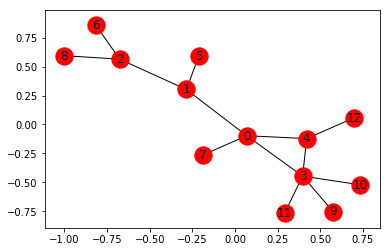

In [20]:
networkx.draw_networkx(graph)

In [21]:
ranking_result = networkx.pagerank(graph)

In [22]:
print(sorted(ranking_result.items(),key=lambda x:x[1],reverse=True))

[(3, 0.1710153515625564), (0, 0.13336652554455752), (4, 0.12977839182517642), (2, 0.12045204395944241), (1, 0.1104052905722436), (6, 0.04566746654473427), (8, 0.04566746654473427), (5, 0.04281927231199835), (9, 0.04061089709913097), (10, 0.04061089709913097), (11, 0.04061089709913097), (7, 0.03987917450012485), (12, 0.03911632533703903)]


#### Task 2 使用PageRank 对文本进行关联分析

In [84]:
#hints: 代码可以在Github Group 中看到

Q6. 切句子是如何实现的？如何使用正则表达式进行句子分割？ 

回答：

In [11]:
import re

In [9]:
def split_sentences(text,p='(：“|。”|？”|[。.，,？])',filter_p='\s+'):
    f_p = re.compile(filter_p)
    text = re.sub(f_p,'',text)
    pattern = re.compile(p)
    split = re.split(pattern,text)
    return split

In [143]:
split_sentences(main_content['content'].iloc[6])[::2]

['虽然至今夏普智能手机在市场上无法排得上号',
 '已经完全没落',
 '并于2013年退出中国市场',
 '但是今年3月份官方突然宣布回归中国',
 '预示着很快就有夏普新机在中国登场了',
 '那么',
 '第一款夏普手机什么时候登陆中国呢',
 '又会是怎么样的手机呢',
 '近日',
 '一款型号为FS8016的夏普神秘新机悄然出现在GeekBench的跑分库上',
 '从其中相关信息了解到',
 '这款机子并非旗舰定位',
 '所搭载的是高通骁龙660处理器',
 '配备有4GB的内存',
 '骁龙660是高通今年最受瞩目的芯片之一',
 '采用14纳米工艺',
 '八个Kryo260核心设计',
 '集成Adreno512GPU和X12LTE调制解调器',
 '当前市面上只有一款机子采用了骁龙660处理器',
 '那就是已经上市销售的OPPOR11',
 '骁龙660尽管并非旗舰芯片',
 '但在多核新能上比去年骁龙820强',
 '单核改进也很明显',
 '所以放在今年仍可以让很多手机变成高端机',
 '不过',
 '由于OPPO与高通签署了排他性协议',
 '可以独占两三个月时间',
 '考虑到夏普既然开始测试新机了',
 '说明只要等独占时期一过',
 '夏普就能发布骁龙660新品了',
 '按照之前被曝光的渲染图了解',
 '夏普的新机核心竞争优势还是全面屏',
 '因为从2013年推出全球首款全面屏手机EDGEST302SH至今',
 '夏普手机推出了多达28款的全面屏手机',
 '在5月份的媒体沟通会上',
 '惠普罗忠生表示',
 '我敢打赌',
 '12个月之后',
 '在座的各位手机都会换掉',
 '因为全面屏时代的到来',
 '我们怀揣的手机都将成为传统手机',
 '']

In [33]:
hint('0xa 0x70 0x61 0x74 0x74 0x65 0x72 0x6e 0x20 0x3d 0x20 0x72 0x65 0x2e 0x63 0x6f 0x6d 0x70 0x69 0x6c 0x65 0x28 0x27 0x5b 0x3002 0xff0c 0x2c 0x2e 0x5d 0xff1a 0x27 0x29 0xa 0x73 0x70 0x6c 0x69 0x74 0x20 0x3d 0x20 0x70 0x61 0x74 0x74 0x65 0x72 0x6e 0x2e 0x73 0x75 0x62 0x28 0x27 0x20 0x27 0x2c 0x20 0x73 0x65 0x6e 0x74 0x65 0x6e 0x63 0x65 0x29 0x2e 0x73 0x70 0x6c 0x69 0x74 0x28 0x29 0x20 0x20 0x23 0x20 0x73 0x70 0x6c 0x69 0x74 0x20 0x73 0x65 0x6e 0x74 0x65 0x6e 0x63 0x65 0xa')


pattern = re.compile('[。，,.]：')
split = pattern.sub(' ', sentence).split()  # split sentence



Q7. 如果对切词之后的句子的标点符号进行恢复？

回答：

In [144]:
split = split_sentences(main_content['content'].iloc[6])

In [145]:
sen_pun = {sen:pun for sen, pun in zip(split[::2],split[1::2])}

In [146]:
sen_pun

{'虽然至今夏普智能手机在市场上无法排得上号': '，',
 '已经完全没落': '，',
 '并于2013年退出中国市场': '，',
 '但是今年3月份官方突然宣布回归中国': '，',
 '预示着很快就有夏普新机在中国登场了': '。',
 '那么': '，',
 '第一款夏普手机什么时候登陆中国呢': '？',
 '又会是怎么样的手机呢': '？',
 '近日': '，',
 '一款型号为FS8016的夏普神秘新机悄然出现在GeekBench的跑分库上': '。',
 '从其中相关信息了解到': '，',
 '这款机子并非旗舰定位': '，',
 '所搭载的是高通骁龙660处理器': '，',
 '配备有4GB的内存': '。',
 '骁龙660是高通今年最受瞩目的芯片之一': '，',
 '采用14纳米工艺': '，',
 '八个Kryo260核心设计': '，',
 '集成Adreno512GPU和X12LTE调制解调器': '。',
 '当前市面上只有一款机子采用了骁龙660处理器': '，',
 '那就是已经上市销售的OPPOR11': '。',
 '骁龙660尽管并非旗舰芯片': '，',
 '但在多核新能上比去年骁龙820强': '，',
 '单核改进也很明显': '，',
 '所以放在今年仍可以让很多手机变成高端机': '。',
 '不过': '，',
 '由于OPPO与高通签署了排他性协议': '，',
 '可以独占两三个月时间': '。',
 '考虑到夏普既然开始测试新机了': '，',
 '说明只要等独占时期一过': '，',
 '夏普就能发布骁龙660新品了': '。',
 '按照之前被曝光的渲染图了解': '，',
 '夏普的新机核心竞争优势还是全面屏': '，',
 '因为从2013年推出全球首款全面屏手机EDGEST302SH至今': '，',
 '夏普手机推出了多达28款的全面屏手机': '。',
 '在5月份的媒体沟通会上': '，',
 '惠普罗忠生表示': '：“',
 '我敢打赌': '，',
 '12个月之后': '，',
 '在座的各位手机都会换掉': '。',
 '因为全面屏时代的到来': '，',
 '我们怀揣的手机都将成为传统手机': '。”'}

In [7]:
hint('0xa 0x63d0 0x793a 0xff1a 0x5efa 0x7acb 0x53e5 0x5b50 0x548c 0x6807 0x70b9 0x7b26 0x53f7 0x4e4b 0x95f4 0x7684 0x5173 0x7cfb 0xff0c 0x4f8b 0x5982 0xff0c 0x5efa 0x7acb 0x4e00 0x4e2a 0x5b57 0x5178 0xa')


提示：建立句子和标点符号之间的关系，例如，建立一个字典



In [147]:
def get_summarization_by_textrank(text,max_len=200):
    return merge_sen_from_scores(text,text_rank,max_len)

In [148]:
def merge_sen_from_scores(text,score_fn,max_len=200):
    splited = split_sentences(text)
    ranked_sen = score_fn(text)
    selected_sen = set()
    
    temp_text = ''
    
    for sen,_ in ranked_sen:
        if len(temp_text)<max_len:
            temp_text += sen
            selected_sen.add(sen)
            
    summary_sen = []
    for sen,punc in zip(splited[::2],splited[1::2]):
        if sen in selected_sen:
            summary_sen.extend([sen,punc])
            
    return cut_tail(summary_sen)

In [149]:
def cut_tail(sen_list,fin_pun='。.？'):
    if sen_list[-1] in set(fin_pun):
        return sen_list
    else:
        return cut_tail(sen_list[:-2])

In [150]:
def text_rank(text,window=5):
    graph = get_sentence_graph(text,window)
    scored_sen = networkx.pagerank(graph)
    ranked_sen = sorted(scored_sen.items(),key=lambda x:x[-1],reverse=True)
    return ranked_sen

In [151]:
def get_sentence_graph(text,window=5):
    sen_graph = networkx.graph.Graph()
    sub_sens = split_sentences(text)[::2]
    
    for i,sen in enumerate(sub_sens):
        for ii in range(i-window,i+window+1):
            if ii>=0 and ii<len(sub_sens):
                edge = (sen,sub_sens[ii])
                sen_graph.add_edges_from([edge])
    return sen_graph

In [152]:
''.join(get_summarization_by_textrank(main_content['content'].iloc[6]))

'那么，第一款夏普手机什么时候登陆中国呢？又会是怎么样的手机呢？近日，一款型号为FS8016的夏普神秘新机悄然出现在GeekBench的跑分库上。从其中相关信息了解到，这款机子并非旗舰定位，所搭载的是高通骁龙660处理器，按照之前被曝光的渲染图了解，夏普的新机核心竞争优势还是全面屏，因为从2013年推出全球首款全面屏手机EDGEST302SH至今，夏普手机推出了多达28款的全面屏手机。'

#### Task3 在Pycharm里边合并代码，合并成一个单独的函数，实现输入一篇文章，输出该文本的摘要流程

`Jupyter Notebook`里边适合做中间结果的记录以及想法验证，真正开发还是要在Pycharm等集成IDE里边进行

## 使用词向量进行自动摘要

Q8. 使用词向量进行自动摘要的基本假设是什么？ 

回答:词向量能衡量词的语意相似性，那么由词向量组成的句向量也可以衡量句子之间的相似度，筛选出与文本大意相关的句子。

In [24]:
hint('0xa 0x53e5 0x5b50 0x5411 0x91cf 0x80fd 0x591f 0x8861 0x91cf 0x53e5 0x5b50 0x4e4b 0x95f4 0x7684 0x76f8 0x4f3c 0x5ea6 0xff0c 0x6545 0x800c 0x53ef 0x4ee5 0x901a 0x8fc7 0x8be5 0x65b9 0x6cd5 0x5224 0x65ad 0x67d0 0x4e2a 0x53e5 0x5b50 0x662f 0x5426 0x548c 0x6587 0x672c 0x542b 0x4e49 0x76f8 0x5173 0xa')


句子向量能够衡量句子之间的相似度，故而可以通过该方法判断某个句子是否和文本含义相关



#### Task4. 使用普林斯顿2017年的sentence embedding方法，进行句子embedding的构建

In [101]:
with open('all_corpus.txt','w',encoding='utf-8') as f:
    f.write('\r\n'.join(main_content['tokenized_content'].tolist()))

In [103]:
from gensim.models import FastText
from gensim.models.word2vec import LineSentence
from gensim.test.utils import get_tmpfile

In [104]:
model = FastText(LineSentence('all_corpus.txt'),window=8,size=200,iter=10,min_count=1)

In [105]:
fname = get_tmpfile("news_token.model")

In [106]:
model.save(fname)

In [17]:
tokens = [token for line in main_content['tokenized_content'].tolist() for token in line.split()]

In [18]:
from collections import Counter

token_counter = Counter(tokens)
word_frequency = {w:counts/len(tokens) for w,counts in token_counter.items()}

In [20]:
import pickle

In [22]:
with open('word_fre.pkl','wb') as f:
    pickle.dump(word_frequency,f)

In [109]:
def SIF_sentence_embedding(text,alpha=1e-4):
    global word_frequency
    
    max_fre = max(word_frequency.values())
    sen_vec = np.zeros_like(model.wv['测试'])
    words = cut(text).split()
    words = [w for w in words if w in model]
    
    for w in words:
        fre = word_frequency.get(w,max_fre)
        weight = alpha/(fre+alpha)
        sen_vec += weight*model.wv[w]
        
    sen_vec /= len(words)
    #skip SVD
    return sen_vec

In [130]:
from scipy.spatial.distance import cosine
from functools import partial

def get_corr(text,embed_fn=SIF_sentence_embedding):
    if isinstance(text,list): text = ' '.join(text)
        
    sub_sentences = split_sentences(text)[::2]
    sen_vec = embed_fn(text)
    
    corr_score = {}
    
    for sen in sub_sentences:
        sub_sen_vec = embed_fn(sen)
        corr_score[sen] = cosine(sen_vec,sub_sen_vec)
        
    return sorted(corr_score.items(),key=lambda x:x[1],reverse=True)

In [131]:
get_corr_SIF = partial(get_corr,embed_fn=SIF_sentence_embedding)

Q9. 该句子embedding的原理是什么，有什么优势？ 

回答：一个句子的含义往往是由其中比较重要的几个词决定的，所以句向量可以看做是词向量的加权平均，而一般来讲在文档中出现的比较少的词比较重要，应给予较大的权重，反之亦然。这样做的优势是利用了词向量的优点，算法简单高效，产出的句向量质量相当高。

In [37]:
hint('0xa 0x63d0 0x793a 0xff1a 0x9891 0x7387 0xff0c 0x91cd 0x8981 0x6027 0xff0c 0x5feb 0x901f 0xff0c 0x6027 0x80fd 0x597d 0xa')


提示：频率，重要性，快速，性能好



Q10. embedding是什么？ 用数学的方式解释embedding。

回答：embedding就是把实体从一向量空间投影到另一个向量空间，同时仍然保留了大部分实体的大部分特性。

In [38]:
hint('0xa 0x63d0 0x793a 0xff1a 0x5047 0x8bbe 0x4e24 0x4e2a 0x65 0x6e 0x74 0x69 0x74 0x79 0x4fdd 0x6301 0x5177 0x6709 0x67d0 0x79cd 0x201c 0x504f 0x5e8f 0x201d 0x7279 0x6027 0xff0c 0x5373 0xff0c 0x53ef 0x4ee5 0x6bd4 0x8f83 0xff0c 0x90a3 0x4e48 0xff0c 0x5c06 0x8fd9 0x4e24 0x4e2a 0x20 0x65 0x6e 0x74 0x69 0x74 0x79 0x20 0x6295 0x5f71 0x5230 0x53e6 0x5916 0x7684 0x7a7a 0x95f4 0x4e2d 0xff0c 0x5728 0x8be5 0x7a7a 0x95f4 0x4e2d 0xff0c 0x8fd9 0x79cd 0x201c 0x504f 0x5e8f 0x201d 0x4f9d 0x7136 0x80fd 0x591f 0x4fdd 0x6301 0xa')


提示：假设两个entity保持具有某种“偏序”特性，即，可以比较，那么，将这两个 entity 投影到另外的空间中，在该空间中，这种“偏序”依然能够保持



Q11. 除了word embedding， sentence embedding， embedding还可以应用到哪些场景？

回答：Graph embedding

In [95]:
hint('0xa 0x4f8b 0x5982 0x793e 0x4ea4 0x7f51 0x7edc 0x91cc 0x8fb9 0x4eba 0x5458 0x7684 0x65 0x6d 0x62 0x65 0x64 0x64 0x69 0x6e 0x67 0xff08 0x8fdb 0x884c 0x597d 0x53cb 0x63a8 0x8350 0xff09 0xff0c 0x20 0x8d2d 0x7269 0x7f51 0x7ad9 0x5546 0x54c1 0x7684 0x65 0x6d 0x62 0x65 0x64 0x64 0x69 0x6e 0x67 0xff08 0x8fdb 0x884c 0x5546 0x54c1 0x63a8 0x8350 0xff09 0xa 0x53e6 0x5916 0xff0c 0x53ef 0x4ee5 0x601d 0x8003 0x4e00 0x4e0b 0x57fa 0x4e8e 0x8fd9 0x79cd 0x65 0x6d 0x62 0x65 0x64 0x64 0x69 0x6e 0x67 0x7684 0x63a8 0x8350 0x7684 0x4f18 0x70b9 0x5728 0x54ea 0x91cc 0xff1f 0x20 0xa')


例如社交网络里边人员的embedding（进行好友推荐）， 购物网站商品的embedding（进行商品推荐）
另外，可以思考一下基于这种embedding的推荐的优点在哪里？ 



Q12. 这种embedding的方法和tfidf有何异同？ 

回答：tfidf只考虑的全局和局部的词频，这种embedding考虑的局部的词语关系和全局的词频。

In [8]:
hint('0xa+0x63d0+0x793a+0xff1a+0x74+0x66+0x69+0x64+0x66+0x8003+0x8651+0x7684+0x9891+0x7387+0x5176+0x20+0x74+0x66+0x20+0x548c+0x20+0x69+0x64+0x66+0x20+0x5206+0x522b+0x662f+0x4ec0+0x4e48+0xff1f+0x20+0x8be5+0x65+0x6d+0x62+0x65+0x64+0x64+0x69+0x6e+0x67+0x7684+0x9891+0x7387+0x7c7b+0x4f3c+0x4e8e+0x4ec0+0x4e48+0xff1f+0x20+0xa')


提示：tfidf考虑的频率其 tf 和 idf 分别是什么？ 该embedding的频率类似于什么？ 



Q13. 构建句子想了的过程中，面对未知的单词，如果解决？

回答: 1.自己训练词向量。2.增广词向量。3.用固定值代替。4.用随机值代替。

In [9]:
hint('0xa+0x5f00+0x53d1+0x578b+0x95ee+0x9898+0xff0c+0x53ef+0x4ee5+0x7701+0x7565+0xff0c+0x53ef+0x4ee5+0x8d4b+0x4e88+0x968f+0x673a+0x503c+0xff0c+0x53ef+0x4ee5+0x7ed9+0x4e00+0x7279+0x5b9a+0x503c+0xff0c+0x5177+0x4f53+0x60c5+0x51b5+0x9700+0x8981+0x7ecf+0x8fc7+0x8bd5+0x9a8c+0x8fdb+0x884c+0x5206+0x6790+0xa')


开发型问题，可以省略，可以赋予随机值，可以给一特定值，具体情况需要经过试验进行分析



Q14. 构建完成句子向量之后，句子相似度如何判断？ 

回答：cosine距离

In [96]:
hint('0xa+0x63+0x6f+0x73+0x69+0x6e+0x65+0xff0c+0x20+0x4f59+0x5f26+0x8ddd+0x79bb+0xa')


cosine， 余弦距离



Q15. 为什么要用cosine距离进行判断，为何不用欧几里得？ 

回答：因为我们要衡量语意相似性，判断的是两个向量的夹角大小。

In [97]:
hint('0xa+0x63d0+0x793a+0xff1a+0x8bf7+0x53c2+0x8003+0x77+0x6f+0x72+0x64+0x32+0x76+0x65+0x63+0x8bad+0x7ec3+0x65f6+0x5019+0x7684+0x7684+0x6982+0x7387+0x5206+0x5e03+0x7684+0x5b9a+0x4e49+0xff0c+0x53ef+0x4ee5+0x770b+0x5230+0x5176+0x6c+0x6f+0x73+0x73+0x5f53+0x65f6+0x4f18+0x5316+0x7684+0x5c31+0x662f+0x20+0x65+0x78+0x70+0x28+0x76+0x31+0x20+0x2e+0x20+0x76+0x32+0x29+0x2c+0x20+0x90a3+0x4e48+0x5f53+0x20+0x76+0x31+0x20+0x2e+0x20+0x76+0x32+0x6700+0x5927+0x7684+0x65f6+0x5019+0xff0c+0xa+0x5c31+0x662f+0x8fd9+0x4e24+0x4e2a+0x5411+0x91cf+0x65b9+0x5411+0x4e00+0x81f4+0x7684+0x65f6+0x5019+0xff0c+0x6240+0x4ee5+0xff0c+0x8be5+0x8bcd+0x5411+0x91cf+0x5728+0x8bad+0x7ec3+0x7684+0x65f6+0x5019+0x7684+0x6c+0x6f+0x73+0x73+0x7684+0x8861+0x91cf+0xff0c+0x5c31+0x662f+0x4f9d+0x636e+0x65b9+0x5411+0x8fdb+0x884c+0x7684+0x3002+0x20+0xa')


提示：请参考word2vec训练时候的的概率分布的定义，可以看到其loss当时优化的就是 exp(v1 . v2), 那么当 v1 . v2最大的时候，
就是这两个向量方向一致的时候，所以，该词向量在训练的时候的loss的衡量，就是依据方向进行的。 



In [11]:
hint('0xa+0x53e6+0x5916+0xff0c+0x4e5f+0x4e0d+0x662f+0x4e0d+0x80fd+0x7528+0x6b27+0x51e0+0x91cc+0x5f97+0xff0c+0x4f46+0x662f+0x4f9d+0x636e+0x4e0a+0x4e00+0x63d0+0x793a+0x4e4b+0x5206+0x6790+0xff0c+0x6b27+0x51e0+0x91cc+0x5f97+0x662f+0x4e0d+0x80fd+0x5f88+0x597d+0x4fdd+0x6301+0x8bed+0x4e49+0x76f8+0x4f3c+0x6027+0x7684+0x3002+0x20+0xa')


另外，也不是不能用欧几里得，但是依据上一提示之分析，欧几里得是不能很好保持语义相似性的。 



Q16. cosine距离的时候，如果两个向量的长度区别很大，但是方向类似，cosine的距离是小还是大？ 

回答：cosine距离小

In [12]:
hint('0xa+0x8ddd+0x79bb+0x662f+0x5f88+0x5c0f+0x7684+0xff0c+0x6ce8+0x610f+0xff0c+0x63+0x6f+0x73+0x69+0x6e+0x65+0x4e4b+0x8003+0x8651+0x201c+0x65b9+0x5411+0x201d+0x662f+0x5426+0x4e00+0x6837+0xa')


距离是很小的，注意，cosine之考虑“方向”是否一样



#### Task15 基于Sentene Embedding 在pycharm里边完成句子摘要的完整过程

Q17. 找出几个句子进行plot， 解释其与全文的相关性的排序

请阐述：详情可参考句子相关系数的排序

Q18. 不同类型的文章，例如时政，财经，社会，故事，其相关性分布有何区别？ 

请阐述：详情可参考句子相关系数的排序

In [98]:
hint('0xa+0x63d0+0x793a+0xff1a+0x53ef+0x4ee5+0x4ece+0x5176+0x5206+0x5e03+0x7684+0x5bc6+0x5ea6+0xff0c+0x5206+0x5e03+0x53d8+0x5316+0x7b49+0x8d8b+0x52bf+0x8fdb+0x884c+0x89c2+0x5bdf+0x3002+0xa')


提示：可以从其分布的密度，分布变化等趋势进行观察。



## More Added Feature

### KNN思想

例如，当我们有一个列表是 [1, 1, 2, 3, 8, 1, 2]的时候，其中的 8 数值太大，这在我们的摘要中的表现为，该句子周围的句子都是不那么相关的，但是该句子单独的相关性很高。 那么，如果把这个句子摘录进来，就会导致“不通顺”. 我们可以采用KNN的思想，将这个列表进行重新计算，让它每一个元素的值，等于自己的值和周围的几个值的一个计算结果。 

Q19. 如何使用KNN思想进行“平滑”操作? 请代码实现

回答：

`请补全代码：`
```
L = []
def knn_smooth(): pass

```

In [117]:
import numpy as np

In [118]:
L =  [1, 1, 2, 3, 8, 1, 2]

In [124]:
def knn_smooth(l,window=3):
    l_s = []
    for i in range(len(l)):
        e = np.mean([l[ii] for ii in range(i-window,i+window+1) if ii>=0 and ii<len(l)])
        l_s.append(e)    
    return l_s

In [125]:
knn_smooth(L)

[1.75,
 3.0,
 2.6666666666666665,
 2.5714285714285716,
 2.8333333333333335,
 3.2,
 3.5]

In [25]:
hint('0xa+0x23+0x4e00+0x4e2a+0x53ef+0x4ee5+0x7684+0x73+0x6f+0x6c+0x75+0x74+0x69+0x6f+0x6e+0x662f+0xff1a+0xa+0xa+0x4c+0x20+0x3d+0x20+0x5b+0x31+0x2c+0x20+0x32+0x2c+0x20+0x33+0x2c+0x20+0x34+0x2c+0x20+0x31+0x30+0x2c+0x20+0x31+0x2c+0x20+0x32+0x5d+0xa+0x77+0x69+0x6e+0x64+0x6f+0x77+0x20+0x3d+0x20+0x33+0xa+0xa+0x4c+0x20+0x3d+0x20+0x5b+0x6e+0x70+0x2e+0x6d+0x65+0x61+0x6e+0x28+0x4c+0x5b+0x69+0x2d+0x77+0x69+0x6e+0x64+0x6f+0x77+0x3a+0x69+0x2b+0x77+0x69+0x6e+0x64+0x6f+0x77+0x5d+0x29+0x20+0x66+0x6f+0x72+0x20+0x69+0x20+0x69+0x6e+0x20+0x72+0x61+0x6e+0x67+0x65+0x28+0x6c+0x65+0x6e+0x28+0x4c+0x29+0x29+0x5d+0xa+0x23+0x20+0x5f53+0x7136+0xff0c+0x8fd9+0x91cc+0x7684+0x6e+0x70+0x2e+0x6d+0x65+0x61+0x6e+0x662f+0x4e00+0x79cd+0x6700+0x7b80+0x5355+0x7684+0x5e73+0x5747+0x5316+0x65b9+0x6cd5+0xff0c+0x6211+0x4eec+0x8fd8+0x53ef+0x4ee5+0x8003+0x8651+0x5176+0x4ed6+0x7684+0x4f8b+0x5982+0x8ddd+0x79bb+0x52a0+0x6743+0xff0c+0x7b49+0x65b9+0x6cd5+0xa')


#一个可以的solution是：

L = [1, 2, 3, 4, 10, 1, 2]
window = 3

L = [np.mean(L[i-window:i+window]) for i in range(len(L))]
# 当然，这里的np.mean是一种最简单的平均化方法，我们还可以考虑其他的例如距离加权，等方法



### Title 标题

如果该文本有标题，那么标题可以帮助我们很多。在之前，我们计算每个句子与文章整体的相似度是对每个子句与整体文章进行相似度距离计算，那么，我们这个时候，就可以把标题的embedding结果拿出来，那么每句话的相似度就是这句话与整体文章的相似度和标题的相似度的一个“结合”。

Q20. 请代码实现这一思路。

回答：

In [4]:
title = main_content['title'].iloc[6]
content = main_content['content'].iloc[6]

In [153]:
def get_corr_title(text,title,embed_fn=SIF_sentence_embedding,c_w=0.6):
    if isinstance(text,list): text = ' '.join(text)
        
    sub_sentences = split_sentences(text)[::2]
    sen_vec = embed_fn(text)
    title_vec = embed_fn(title)
    
    corr_score = {}
    
    for sen in sub_sentences:
        sub_sen_vec = embed_fn(sen)
        corr_score[sen] = c_w*cosine(sen_vec,sub_sen_vec)+(1-c_w)*cosine(title_vec,sub_sen_vec)
        
    return sorted(corr_score.items(),key=lambda x:x[1],reverse=True)

In [154]:
get_corr(content)

e:\anaconda3\envs\nlp\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  import sys
e:\anaconda3\envs\nlp\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in true_divide
  


[('近日', 1.0257980953902006),
 ('我敢打赌', 1.0250489246100187),
 ('在5月份的媒体沟通会上', 0.8877190351486206),
 ('惠普罗忠生表示', 0.7606809139251709),
 ('12个月之后', 0.7566633224487305),
 ('并于2013年退出中国市场', 0.7289090752601624),
 ('不过', 0.6761408746242523),
 ('那么', 0.6735551655292511),
 ('说明只要等独占时期一过', 0.6348441243171692),
 ('可以独占两三个月时间', 0.6229501962661743),
 ('八个Kryo260核心设计', 0.6206822097301483),
 ('单核改进也很明显', 0.608751505613327),
 ('但是今年3月份官方突然宣布回归中国', 0.6086093783378601),
 ('由于OPPO与高通签署了排他性协议', 0.599901556968689),
 ('按照之前被曝光的渲染图了解', 0.5981567203998566),
 ('从其中相关信息了解到', 0.5932969748973846),
 ('又会是怎么样的手机呢', 0.5780496597290039),
 ('在座的各位手机都会换掉', 0.5533027052879333),
 ('因为全面屏时代的到来', 0.5450319349765778),
 ('已经完全没落', 0.5398256778717041),
 ('但在多核新能上比去年骁龙820强', 0.5130311250686646),
 ('预示着很快就有夏普新机在中国登场了', 0.5096740424633026),
 ('集成Adreno512GPU和X12LTE调制解调器', 0.48944175243377686),
 ('采用14纳米工艺', 0.47759103775024414),
 ('配备有4GB的内存', 0.4612881541252136),
 ('那就是已经上市销售的OPPOR11', 0.44522857666015625),
 ('这款机子并非旗舰定位', 0.408

In [155]:
get_corr_title(content,title)

e:\anaconda3\envs\nlp\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  import sys
e:\anaconda3\envs\nlp\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in true_divide
  


[('我敢打赌', 1.0093366220593452),
 ('近日', 0.9959632877260447),
 ('在5月份的媒体沟通会上', 0.9114610329270363),
 ('不过', 0.7739797592163086),
 ('那么', 0.7693613797426224),
 ('12个月之后', 0.7622941970825194),
 ('惠普罗忠生表示', 0.7616108417510987),
 ('说明只要等独占时期一过', 0.7340350925922394),
 ('并于2013年退出中国市场', 0.7114164590835572),
 ('又会是怎么样的手机呢', 0.7046305686235428),
 ('单核改进也很明显', 0.7037906289100647),
 ('可以独占两三个月时间', 0.6965544879436494),
 ('从其中相关信息了解到', 0.6936014115810394),
 ('在座的各位手机都会换掉', 0.6674531280994416),
 ('但是今年3月份官方突然宣布回归中国', 0.6667504608631134),
 ('八个Kryo260核心设计', 0.6588986337184906),
 ('已经完全没落', 0.649932724237442),
 ('按照之前被曝光的渲染图了解', 0.6405621230602265),
 ('由于OPPO与高通签署了排他性协议', 0.6266739845275879),
 ('但在多核新能上比去年骁龙820强', 0.5796118259429932),
 ('预示着很快就有夏普新机在中国登场了', 0.5527364313602448),
 ('这款机子并非旗舰定位', 0.5409763097763062),
 ('集成Adreno512GPU和X12LTE调制解调器', 0.5404521942138671),
 ('采用14纳米工艺', 0.5399949193000794),
 ('配备有4GB的内存', 0.5396489739418029),
 ('因为全面屏时代的到来', 0.5362727820873261),
 ('那就是已经上市销售的OPPOR11', 0.52696

In [26]:
hint('0xa+0x74+0x69+0x74+0x6c+0x65+0x20+0x3d+0x20+0x27+0x73+0x6f+0x6d+0x65+0x20+0x77+0x6f+0x72+0x64+0x73+0x27+0xa+0x63+0x6f+0x6e+0x74+0x65+0x6e+0x74+0x20+0x3d+0x20+0x27+0x6d+0x6f+0x72+0x65+0x20+0x61+0x6e+0x64+0x20+0x6d+0x6f+0x72+0x65+0x20+0x77+0x6f+0x72+0x64+0x73+0x27+0xa+0x73+0x65+0x6e+0x74+0x65+0x6e+0x65+0x5f+0x76+0x65+0x63+0x5f+0x74+0x69+0x74+0x6c+0x65+0x20+0x3d+0x20+0x67+0x65+0x74+0x5f+0x73+0x65+0x6e+0x74+0x65+0x6e+0x63+0x65+0x5f+0x76+0x65+0x63+0x28+0x74+0x69+0x74+0x6c+0x65+0x29+0xa+0x73+0x65+0x6e+0x74+0x65+0x6e+0x65+0x5f+0x76+0x65+0x63+0x5f+0x63+0x6f+0x6e+0x74+0x65+0x6e+0x74+0x20+0x3d+0x20+0x67+0x65+0x74+0x5f+0x73+0x65+0x6e+0x74+0x65+0x6e+0x63+0x65+0x5f+0x76+0x65+0x63+0x28+0x63+0x6f+0x6e+0x74+0x65+0x6e+0x74+0x29+0xa+0x23+0x5bf9+0x4e8e+0x4e00+0x4e2a+0x5b50+0x53e5+0x20+0x73+0x75+0x62+0x5f+0x73+0x65+0x6e+0x5f+0x6e+0x2c+0x20+0x4ee5+0x524d+0x7684+0x73+0x69+0x6d+0x69+0x6c+0x61+0x72+0x69+0x74+0x79+0x662f+0x20+0x63+0x6f+0x73+0x69+0x6e+0x65+0x28+0x67+0x65+0x74+0x5f+0x73+0x65+0x6e+0x74+0x65+0x6e+0x65+0x5f+0x76+0x65+0x63+0x28+0x73+0x75+0x62+0x5f+0x73+0x65+0x6e+0x5f+0x6e+0x29+0x2c+0x20+0x73+0x65+0x6e+0x74+0x65+0x6e+0x65+0x5f+0x76+0x65+0x63+0x5f+0x63+0x6f+0x6e+0x74+0x65+0x6e+0x74+0x29+0xa+0x23+0x73b0+0x5728+0x53ef+0x4ee5+0x662f+0xa+0x70+0x20+0x3d+0x20+0x30+0x2e+0x35+0xa+0x73+0x65+0x6e+0x5f+0x76+0x65+0x63+0x20+0x3d+0x20+0x67+0x65+0x74+0x5f+0x73+0x65+0x6e+0x74+0x65+0x6e+0x65+0x5f+0x76+0x65+0x63+0x28+0x73+0x75+0x62+0x5f+0x73+0x65+0x6e+0x5f+0x6e+0x29+0xa+0x73+0x69+0x6d+0x69+0x6c+0x61+0x72+0x69+0x74+0x79+0x20+0x3d+0x20+0x70+0x20+0x2a+0x20+0x63+0x6f+0x73+0x69+0x6e+0x65+0x28+0x73+0x65+0x6e+0x5f+0x76+0x65+0x63+0x2c+0x20+0x73+0x65+0x6e+0x74+0x65+0x6e+0x65+0x5f+0x76+0x65+0x63+0x5f+0x74+0x69+0x74+0x6c+0x65+0x29+0x20+0x2b+0x20+0x28+0x31+0x20+0x2d+0x20+0x70+0x29+0x20+0x2a+0x20+0x63+0x6f+0x73+0x69+0x6e+0x65+0x28+0x73+0x65+0x6e+0x5f+0x76+0x65+0x63+0x2c+0x20+0x73+0x65+0x6e+0x74+0x65+0x6e+0x65+0x5f+0x76+0x65+0x63+0x5f+0x63+0x6f+0x6e+0x74+0x65+0x6e+0x74+0x29+0xa+0x23+0x20+0x5f53+0x7136+0xff0c+0x8fd9+0x91cc+0x7684+0x70+0x4ee5+0x53ca+0x70+0x548c+0x63+0x6f+0x73+0x69+0x6e+0x65+0x7684+0x6784+0x5efa+0x90fd+0x662f+0x53ef+0x4ee5+0x53d8+0x5316+0x7684+0x3002+0x20+0x70+0x20+0x548c+0x20+0x31+0x2d+0x70+0x662f+0x7ebf+0x6027+0x5173+0x7cfb+0xff0c+0x53ef+0x4ee5+0x662f+0x5176+0x4ed6+0x7684+0x5173+0x7cfb+0x3002+0x81ea+0x5df1+0x5b9a+0x5373+0x53ef+0xa')


title = 'some words'
content = 'more and more words'
sentene_vec_title = get_sentence_vec(title)
sentene_vec_content = get_sentence_vec(content)
#对于一个子句 sub_sen_n, 以前的similarity是 cosine(get_sentene_vec(sub_sen_n), sentene_vec_content)
#现在可以是
p = 0.5
sen_vec = get_sentene_vec(sub_sen_n)
similarity = p * cosine(sen_vec, sentene_vec_title) + (1 - p) * cosine(sen_vec, sentene_vec_content)
# 当然，这里的p以及p和cosine的构建都是可以变化的。 p 和 1-p是线性关系，可以是其他的关系。自己定即可



### Keywords 关键字

对整篇文章提取关键字，该关键字可以通过TextRank或者tfidf或者gensim自带的包进行提取。 然后对包含了关键词的句子进行手动加权

#### Task 请代码实现

### Position 位置信息

对于句子而言，如果其出现在段落开端，结尾，是否是重要的？ 请做实验证明之，并且代码进行改进。 

#### Task 加入位置信息的考量

### Topic 主题信息

自学Gensim LDA的使用方法，对于文章获得其主题，然后依据主题对每个句子进行判断，每个句子是否和该主题相关。 
参考网站： 
1. Google Search： Gensim LDA
2. https://github.com/xiaoyichao/-python-gensim-LDA-/blob/master/topicmodel3.py

In [5]:
from gensim.corpora.dictionary import Dictionary
from gensim.models.ldamodel import LdaModel

text = list(map(lambda x:cut(x).split(),filter(lambda x:x!='',split_sentences(content)[::2])))

common_dict = Dictionary(text)

common_corpus = [common_dict.doc2bow(t) for t in text]

lda = LdaModel(common_corpus,num_topics=5)

for i in range(5):
    print([common_dict[t[0]] for t in lda.get_topic_terms(i,5)])

e:\anaconda3\envs\nlp\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


#### Task 合并以上功能，实现一个单独的函数，该函数接受一个长文本和字数限制，输出一个短文中

## Questions 思考题：

1. 除了Sentence Embedding和TextRank, 还有什么方案？

1.根据sentence embedding的句子相似度，构建有权的textrank图以计算句子评分。
2.把sentence embedding改成使用word2vec。

2. 为什么这个课题不用Seq2Seq?

seq2seq需要大量的标记数据驱动

3. 深度学习、机器学习与NLP之间的关系是什么？ 

NLP涵盖计算机科学，人工智能，语言学。而机器学习属于人工智能的一种实现方式，深度学习是机器学习的一个分分支。

4. 你还有什么其他的思考和心得？ 

详细见我的记录心得:https://juejin.im/post/5ba1d398e51d450e664b3798